# Self-Driving Car Engineer Nanodegree

## Project: **Advanced Lane Finding** 

### 01.Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
%matplotlib inline

## Read in an Image

In [2]:
#Initialization parameters
objpoints = []
imgpoints = []

In [3]:
def corners_unwarp(img, gray_img, objpoints, imgpoints):
    #Undistort Image
    undist_img = cv2.undistort(img, mtx, dist, None, mtx)
    
    #Set offset for dst points
    offset = 100
    
    # Grab the image shape
    img_size = (gray_img.shape[1], gray_img.shape[0])
    
    # For source points I'm grabbing the outer four detected corners
    src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
    
    #Set dst for PerspectiveTransform
    dst = np.float32([[offset, offset], 
                      [img_size[0]-offset, offset], 
                      [img_size[0]-offset, img_size[1]-offset], 
                      [offset, img_size[1]-offset]])
    
    # Given src and dst points, calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    
    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(undist_img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped

These img has some problem! :calibration4.jpg
These img has some problem! :calibration5.jpg


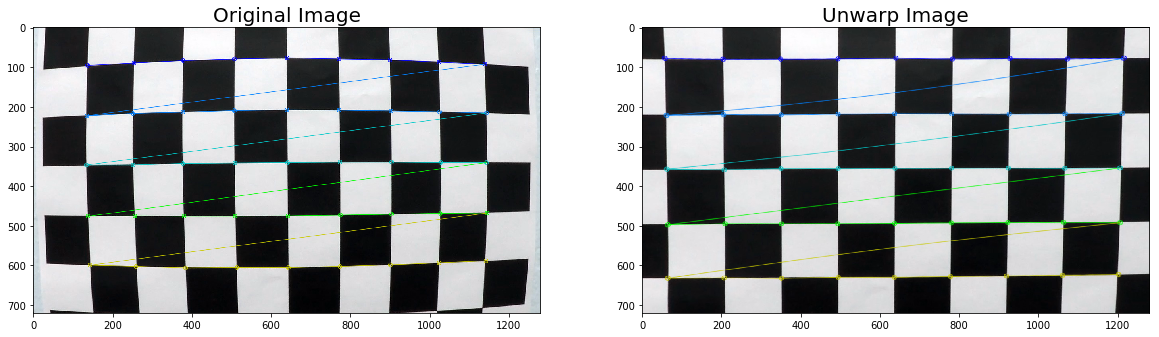

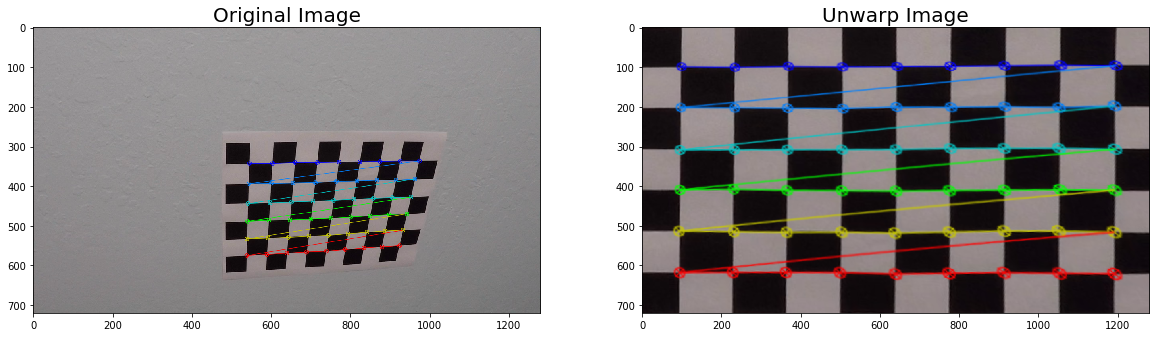

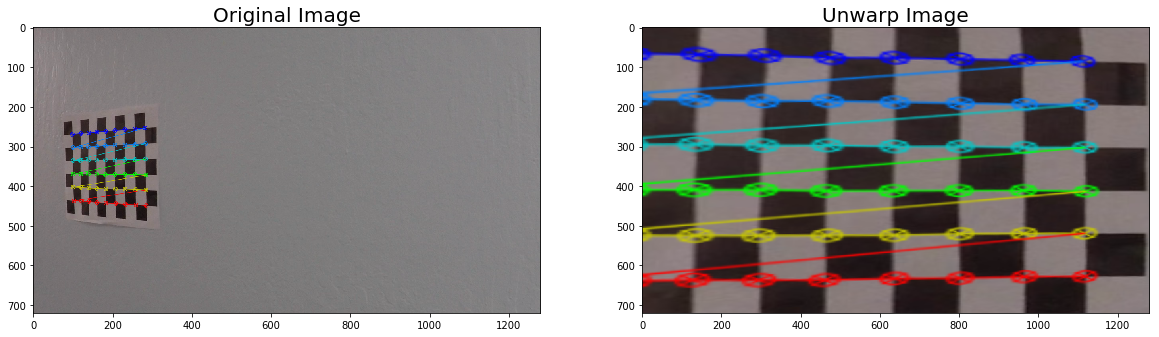

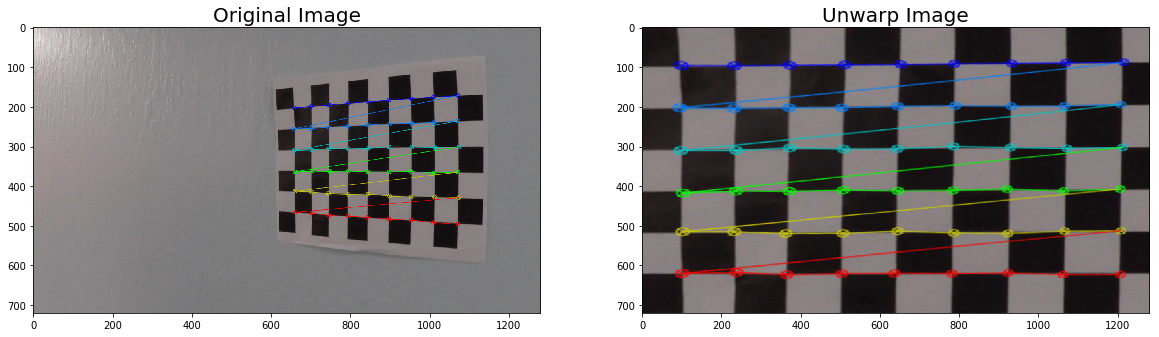

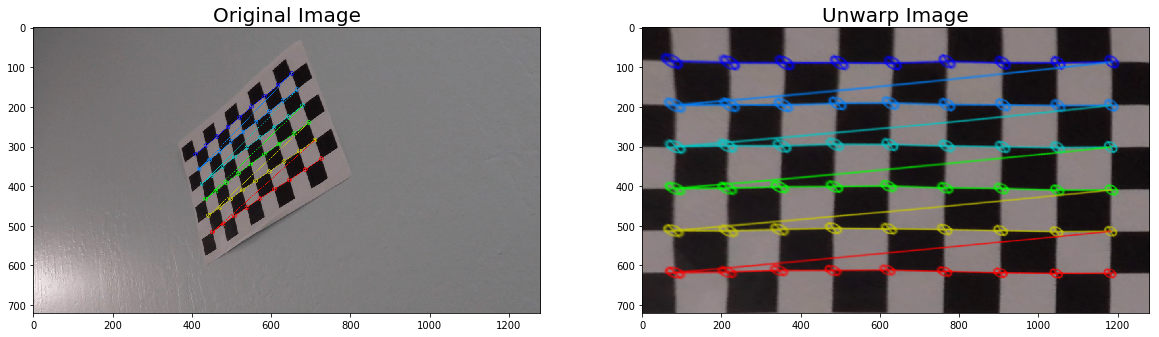

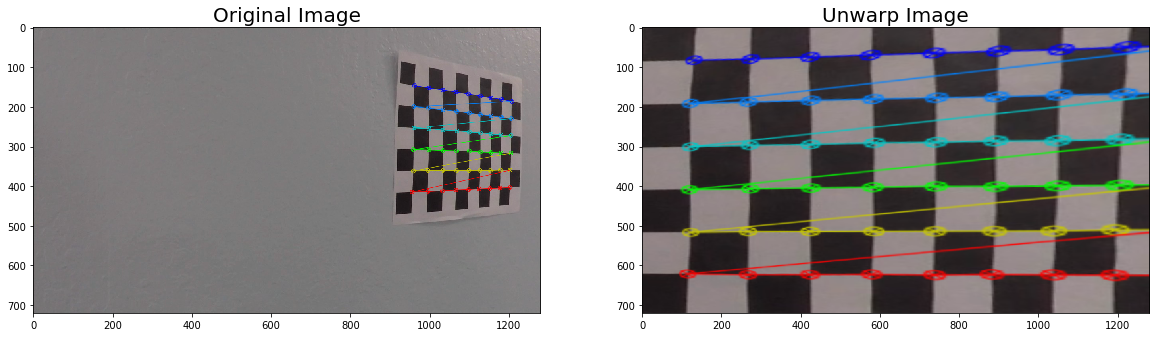

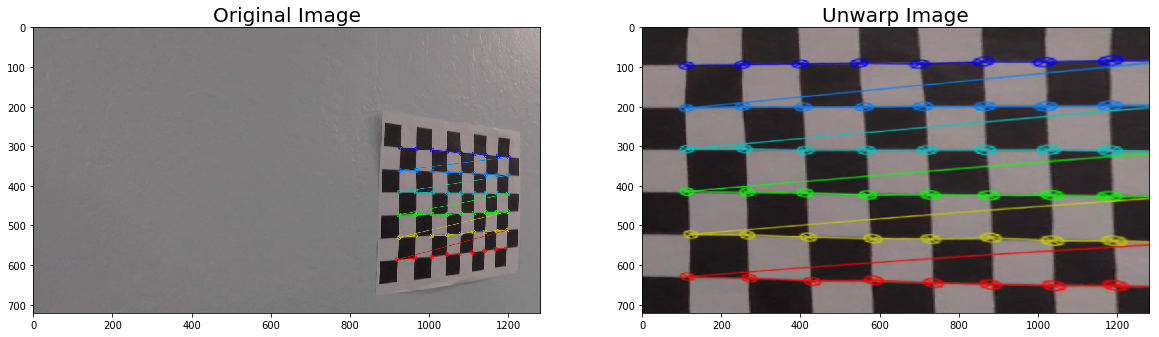

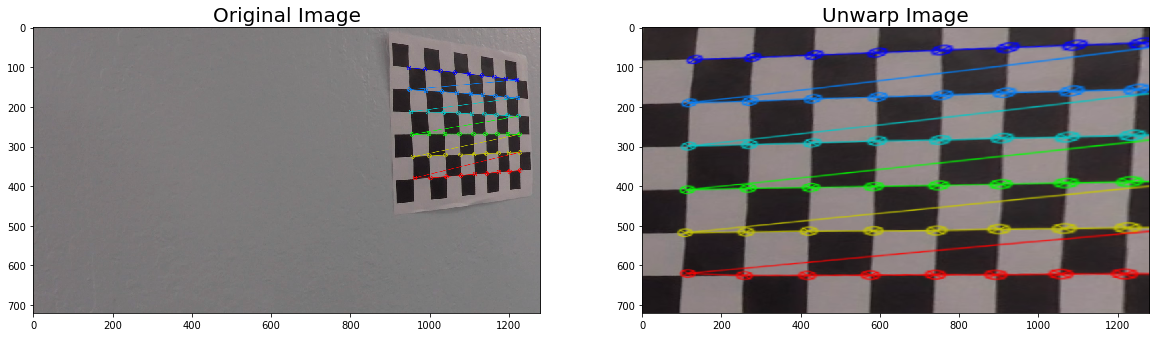

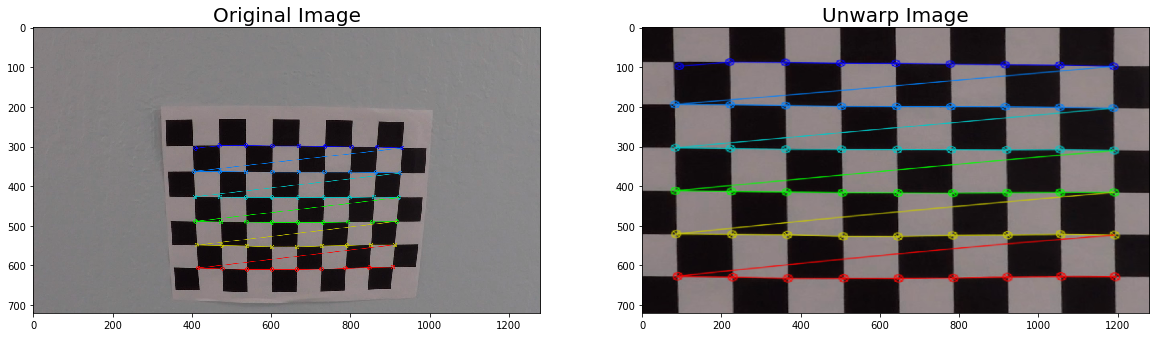

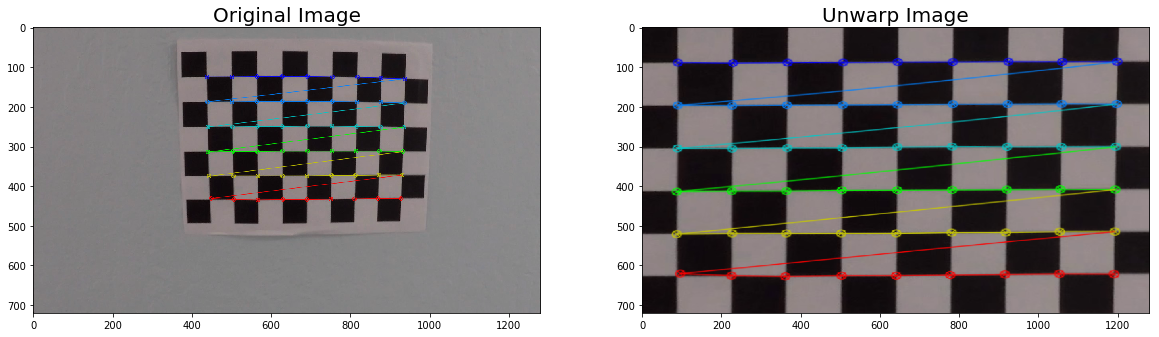

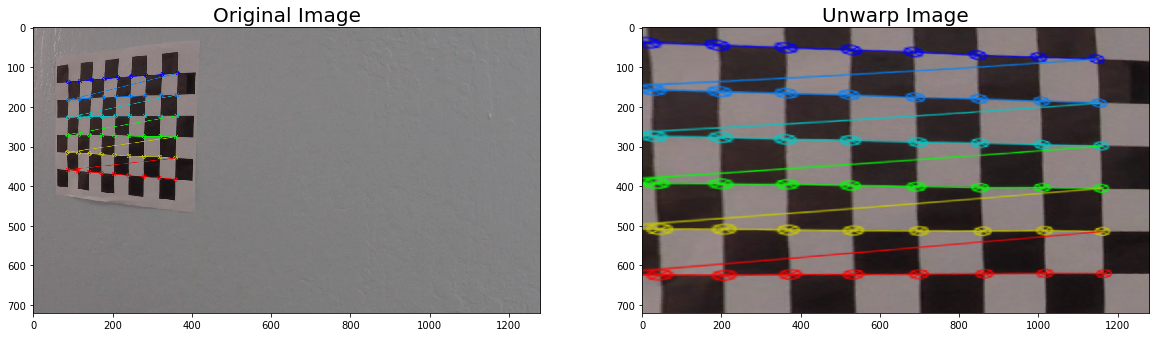

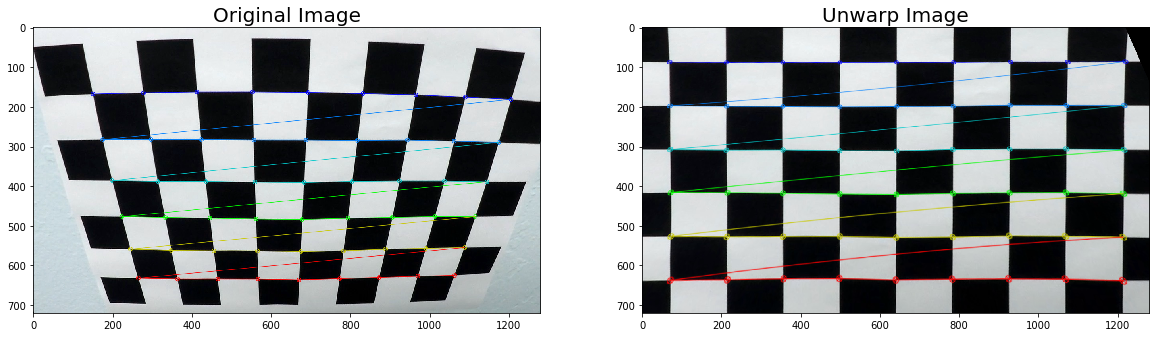

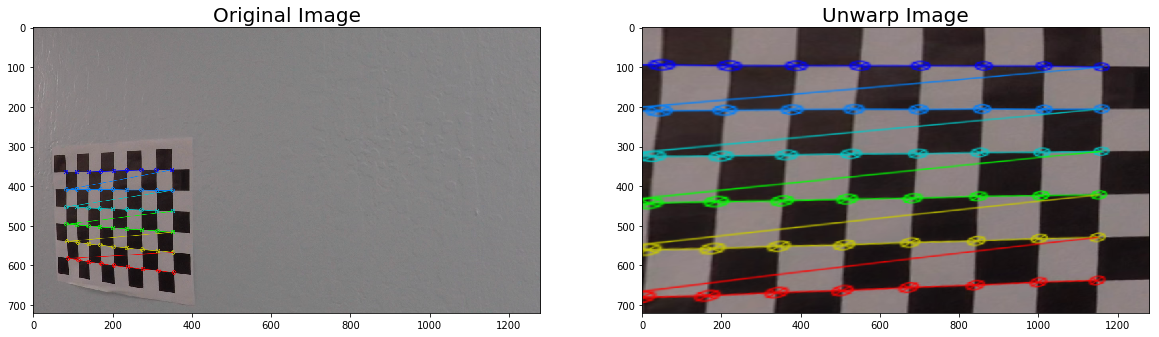

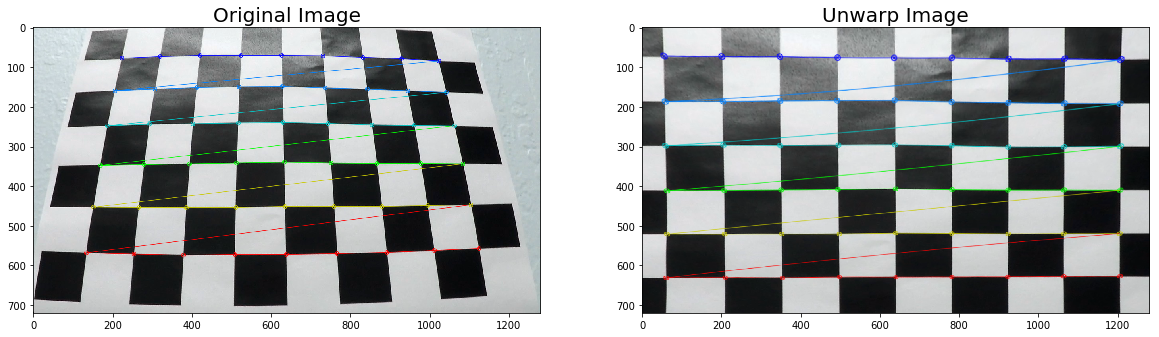

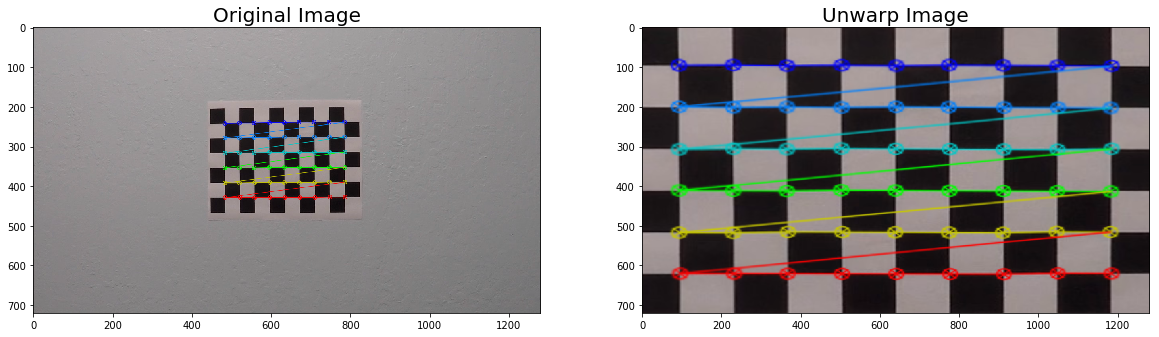

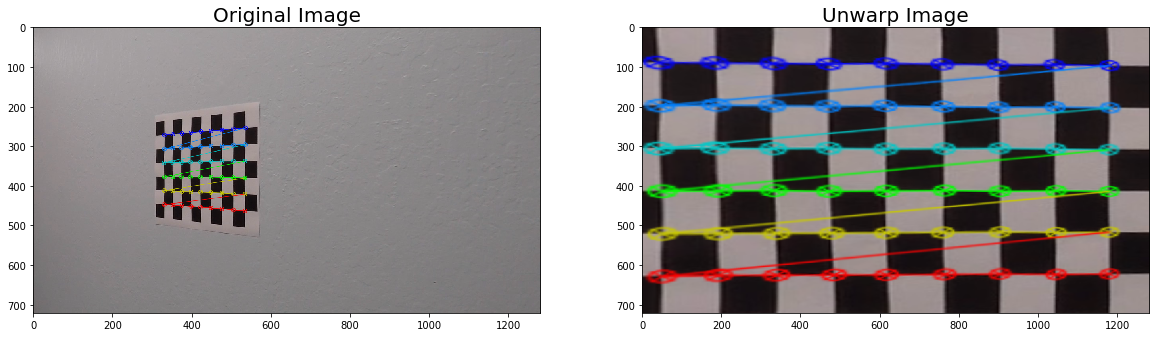

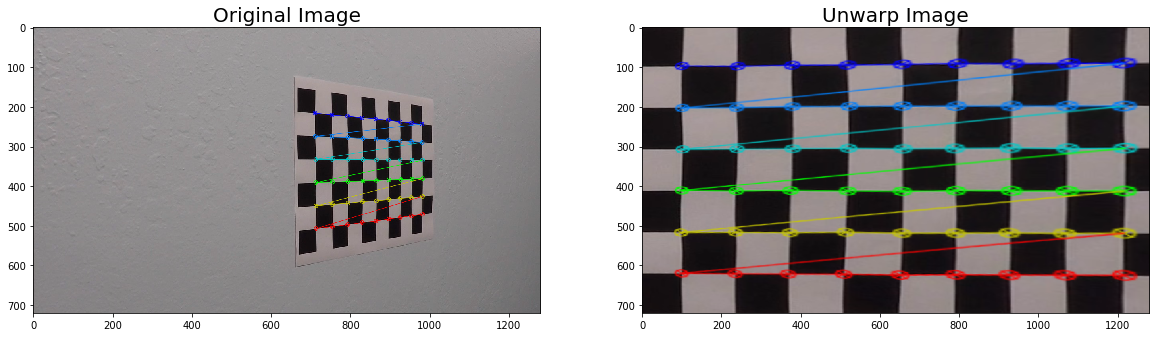

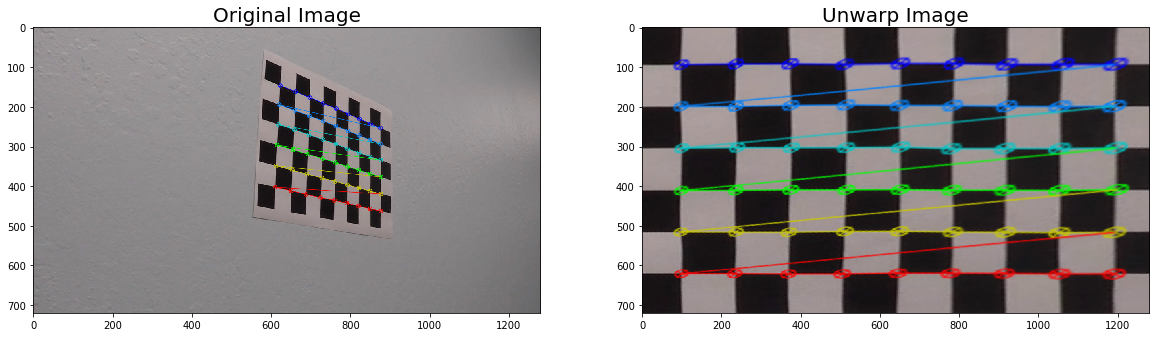

In [4]:
for image_name in os.listdir("camera_cal/"):
    #prepare object points
    #Handle bad image
    if ('calibration1.jpg' in image_name):
        nx = 9
        ny = 5
    else:
        nx = 9
        ny = 6

    objp = np.zeros((ny*nx,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2) #x,y coordinates
    
    #read in each image
    img = cv2.imread("camera_cal/" + image_name)
    
    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray_img, (nx, ny), None)
    
    # If found, draw corners
    if ret == True:
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        #Save points
        objpoints.append(objp)
        imgpoints.append(corners)
        #Calibrate Camera
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1::-1], None, None)
        
        #Unwarped image
        unwarp_undist_img = corners_unwarp(img, gray_img, objpoints, imgpoints)
        
        #Show Result
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,15))
        ax1.imshow(img)
        ax1.set_title('Original Image', fontsize=20)
        ax2.imshow(unwarp_undist_img)
        ax2.set_title('Unwarp Image', fontsize=20)
        
        #Save image
        try:
            mpimg.imsave("camera_cal_output/" + image_name,unwarp_undist_img)
        except FileNotFoundError:
            os.mkdir("./camera_cal_output")
            mpimg.imsave("camera_cal_output/" + image_name,unwarp_undist_img)
    else:
        print("These img has some problem! :" + image_name)

## Save Camera parameters for Pipeline

In [5]:
import pickle
f = open('Camera_parameters.pkl', 'wb')
pickle.dump(mtx, f)
pickle.dump(dist, f)
f.close()